# Introduction to Neural Networks

![Artificial Neurons](artificial_neuron.png "Artificial Neuron")

## What is machine learning?

* Subfield of artificial intelligence that deals with pattern recognition
* Statistical in nature, as opposed to traditional artificial intelligence
* Examples:
  * Handwriting recognition:
  ![Sample of MNIST](mnist.png "Handwriting recognition")
  * Facial recognition:
  ![Picture of G-Wash](gwash.jpg "Facial recognition")
  * Speech recognition:
  ![Speech signal](speech.png "Speech recognition")
  * Knowledge discovery:
  ![Google Neural style](neural_style.png "Knowledge discovery")

### Machine learning problem specification

**Supervised learning**
* Given pairs of `(X = input_data, y = observed_result)`, estimate a function $f(X) = y$
* Pairs of data referred to as training data points

**Unsupervised learning**
* Only given inputs, no labeled outputs
* Objective is to find patterns or clusters in data

We are focusing on supervised learning in this talk. A formalization of supervised learning is:

Define an input matrix $X$ and an output matrix $Y$ as

$$X = \begin{bmatrix}
 x_{11}  & x_{12} & \cdots & x_{1m} \\ 
 x_{21} & x_{22}  & \cdots & x_{2m} \\
 \vdots & \vdots & \ddots & \vdots \\
 x_{n1} & x_{n2} & \cdots & x_{nm} 
\end{bmatrix},\  Y = \begin{bmatrix}
 y_{11}  & y_{12} & \cdots & y_{1k} \\ 
 y_{21} & y_{22}  & \cdots & y_{2k} \\
 \vdots & \vdots & \ddots & \vdots \\
 y_{n1} & y_{n2} & \cdots & y_{nk} 
\end{bmatrix}$$

The goal of most machine learning algorithms is to estimate some function $f : X \rightarrow Y$, where $X$ is an input matrix with $n$ samples and $m$ dimensions, and $Y$ is an output matrix with $n$ samples and $k$ dimensions. In practice, $Y$ often has one dimension. Below are some examples:
  * Predicting market value of house
    * $X$ - information about houses on the market (square feet, location, sales of neighboring houses)
    * $Y$ - the prices these houses sold for
  * Chess AI
    * $X$ - information about the state of the board for particular moves
    * $Y$ - the observed moves from these states
  * Handwriting recognition
    * $X$ - pixel values of images containing a handwritten character
    * $Y$ - the characters which the images represent

## Neural Networks

![NN Architecture](nn_arch.svg "Neural Net Architecture")

* Neurons are **activated** at certain level, which is then **propagated** forward through the various layers
* The strength of activation are controlled by the **weights** of the connections (denoted by arrows)
* A unit's activation is a function of the previous layer's activations, the connection strengths from the previous layer to that particular unit, and some **activation function**

### Neuron computation

Assume that the previous layer has $D$ units, the $i$th unit of which has an activation of $x_i$. The activation of a unit $z_j$ in the next layer has an activation of the form:

$$z_j = f(\sum_{i=1}^{D} x_{i}w_{ij})$$

where $w_{ij}$ is the connection weight from unit $x_i$ to $z_j$. In English: a unit's activation is the weighted sum of the previous layer's activation, passed through some function $f(\cdot)$.

**What's this function $f(\cdot)$?**

This is the activation function, and it allows non-linear transformations at each layer. Some common activation functions:

**Linear**
<img src="linear.png",width=500,height=500>

**Sigmoid**
<img src="sigmoid.png",width=500,height=500>

**Tanh**
<img src="tanh.png",width=500,height=500>

**Rectified Linear Unit**
<img src="relu.png",width=500,height=500>

### Training neural networks

* Define loss function (eg. $L(\hat{y}, y) = \frac{1}{N}\sum_{i=1}^{N} (\hat{y_i} - y_i)^2$)
* Train networks using various **gradient descent** approaches
* Basic idea: update weights according to their contribution to the error so that you "descend" down the error curve

In [1]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Example: MNIST

/Users/isachsquintana/Documents/pymy/twenty_newsgroups/v36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


X: 1797x64 matrix, y: 1797x10 matrix


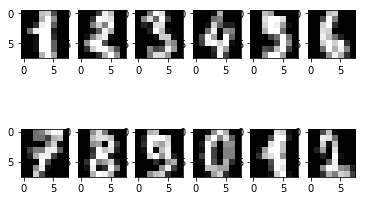

In [3]:
# Read in the MNIST dataset from sci-kit learn
import pandas as pd
from sklearn import datasets
from sklearn import cross_validation
data = datasets.load_digits()
X, y = data['data'], pd.get_dummies(data['target'])
print('X: %dx%d matrix, y: %dx%d matrix' % (X.shape + y.shape))

# Plot some examples
for i in range(1,13):
    plt.subplot(2, 6, i)
    plt.imshow(data.images[i], cmap=plt.cm.gray, interpolation='nearest')

# Last but not least, split the data into a training and test set
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33, random_state=1234)

In [4]:
# Import tensorflow package
import tensorflow as tf

# Create a session object
sess = tf.InteractiveSession()

In [5]:
# Define some placeholder variables
x_ = tf.placeholder(tf.float32, shape=[None, 64])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Define the network computation
W = tf.Variable(tf.zeros([64, 10]))
b = tf.Variable(tf.zeros([10]))
yhat = tf.nn.softmax(tf.matmul(x_, W) + b)

# Define our loss function
mse_loss = tf.reduce_mean(tf.square(yhat - y_))

# Compute accuracy computation
correct_prediction = tf.equal(tf.argmax(yhat,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Set up the training methods
train_step = tf.train.AdamOptimizer(0.1).minimize(mse_loss)
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
# Train the model!
n_iters = 1500
for i in range(n_iters+1):
    # Run through an iteration of the training process
    train_step.run(feed_dict={x_: X_train, y_: y_train})
    
    # Compute the accuracy and loss
    if i % 100 == 0:
        current_loss = mse_loss.eval(feed_dict={x_: X_test, y_: y_test})
        current_acc  = accuracy.eval(feed_dict={x_: X_test, y_: y_test})
        print('Train step: %d, Loss: %.3f, Accuracy: %.3f%%' % (i, current_loss, current_acc * 100.))

Train step: 0, Loss: 0.074, Accuracy: 56.229%
Train step: 100, Loss: 0.042, Accuracy: 77.778%
Train step: 200, Loss: 0.040, Accuracy: 79.293%
Train step: 300, Loss: 0.038, Accuracy: 79.293%
Train step: 400, Loss: 0.043, Accuracy: 77.609%
Train step: 500, Loss: 0.041, Accuracy: 78.620%
Train step: 600, Loss: 0.040, Accuracy: 79.125%
Train step: 700, Loss: 0.042, Accuracy: 78.451%
Train step: 800, Loss: 0.040, Accuracy: 79.125%
Train step: 900, Loss: 0.044, Accuracy: 77.273%
Train step: 1000, Loss: 0.043, Accuracy: 77.441%
Train step: 1100, Loss: 0.042, Accuracy: 78.451%
Train step: 1200, Loss: 0.042, Accuracy: 78.620%
Train step: 1300, Loss: 0.041, Accuracy: 78.956%
Train step: 1400, Loss: 0.041, Accuracy: 78.620%
Train step: 1500, Loss: 0.043, Accuracy: 78.283%


### Adding hidden layers

In [ ]:
# Now we are creating two weight matrices, one that contains the
# weights connecting the input units to the hidden units, and one
# connecting the hidden units to the output units
n_inputs = 64
n_hidden = 64
n_outputs = 10
W_input_to_hidden = tf.Variable(tf.truncated_normal([n_inputs, n_hidden], stddev=0.1))
W_hidden_to_output = tf.Variable(tf.truncated_normal([n_hidden, n_outputs], stddev=0.1))
b_hidden = tf.Variable(tf.constant(0.1, shape=[n_hidden]))
b_output = tf.Variable(tf.constant(0.1, shape=[n_outputs]))

# We now redefine the neural computation. I'm showing it here in
# two steps: one for each layer in the network
hidden_activation = tf.nn.sigmoid(tf.matmul(x_, W_input_to_hidden) + b_hidden)
yhat = tf.nn.softmax(tf.matmul(hidden_activation, W_hidden_to_output) + b_output)

############################
# The rest is the same...
mse_loss = tf.reduce_mean(tf.square(yhat - y_))
correct_prediction = tf.equal(tf.argmax(yhat,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
train_step = tf.train.AdagradOptimizer(0.1).minimize(mse_loss)
sess.run(tf.initialize_all_variables())
n_iters = 1500
for i in range(n_iters+1):
    train_step.run(feed_dict={x_: X_train, y_: y_train})
    if i % 100 == 0:
        current_loss = mse_loss.eval(feed_dict={x_: X_test, y_: y_test})
        current_acc  = accuracy.eval(feed_dict={x_: X_test, y_: y_test})
        print 'Train step: %d, Loss: %.3f, Accuracy: %.3f%%' % (i, current_loss, current_acc * 100.)

### Visual intuition of hidden layers

Using `sci-kit learn`'s `datasets` module, I create a dataset containing two clusters of points, one that is an outer circle and one that is an inner circle.

In [ ]:
# Create a circular dataset
X_circles, y_circles = datasets.make_circles(n_samples=1000, noise=0.1, random_state=1234, factor=0.5)
plt.scatter(X_circles[:,0], X_circles[:,1], c=y_circles, alpha=0.5, s=50)
ys, y_circles = y_circles, pd.get_dummies(y_circles)

# Separate out the data into training and test sets
X_circles_train, X_circles_test, y_circles_train, y_circles_test = cross_validation.train_test_split(
            X_circles, y_circles, test_size=0.33, random_state=1234)

In [ ]:
# Creates the network with the given number of hidden layers
def create_network(X, y, layers=None):
    n_in, n_out = X.shape[1], y.shape[1]
    
    # Make sure we get a list in
    layers = layers or list()
    layers = [n_in] + layers + [n_out]
    
    # Initialize input/output
    x  = tf.placeholder(tf.float32, shape=[None, n_in])
    y_ = tf.placeholder(tf.float32, shape=[None, n_out])
    yhat = x
    
    # Create the hidden layers
    for i in range(len(layers)-1):
        W = tf.Variable(tf.random_uniform([layers[i], layers[i+1]], minval=-1, maxval=1, seed=1234))
        b = tf.Variable(tf.random_uniform([layers[i+1]], minval=-1, maxval=1, seed=1234))
        sess.run(tf.initialize_all_variables())
        yhat = tf.sigmoid(tf.matmul(yhat, W) + b)
    
    # Do softmax at the output layer
    yhat = tf.nn.softmax(yhat)
    
    return yhat, x, y_

# Trains the network and optionally plots the results
def train_network(X, y, layers=None, n_iters=100, plot_step=10):
    yhat, x, y_ = create_network(X, y, layers=layers)
    sess.run(tf.initialize_all_variables())
    
    # Define the loss function
    cross_entropy = tf.reduce_sum(-tf.reduce_sum(y_ * tf.log(yhat)))
    train_step = tf.train.AdamOptimizer(0.05).minimize(cross_entropy)
    sess.run(tf.initialize_all_variables())
    
    # Define accuracy
    correct_prediction = tf.equal(tf.argmax(yhat,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    for i in range(n_iters+1):
        train_step.run(feed_dict={x: X, y_: y})
        if plot_step is not None and i % plot_step == 0:
            # Compute accuracy and loss
            loss = cross_entropy.eval(feed_dict={x: X, y_: y})
            acc = accuracy.eval(feed_dict={x: X, y_: y})
            preds = tf.argmax(yhat,1).eval(feed_dict={x: X, y_: y})
            
            # Plot the results all interactive-like
            plt.clf()
            plt.scatter(X[:,0], X[:,1], c=np.round(preds), alpha=0.5, s=50)
            plt.title('Iter #%d' % i)
            display.display(plt.gcf())
            display.clear_output(wait=True)

With no hidden layers....

In [ ]:
train_network(X_circles, y_circles, layers=[], n_iters=400, plot_step=10)

Now with hidden layers.....

In [ ]:
train_network(X_circles, y_circles, layers=[10], n_iters=100, plot_step=5)

## Other features of TensorFlow

* GPU computing: [https://www.tensorflow.org/versions/r0.9/how_tos/using_gpu/index.html](https://www.tensorflow.org/versions/r0.9/how_tos/using_gpu/index.html)
* Cluster computing: [https://www.tensorflow.org/versions/r0.9/how_tos/distributed/index.html](https://www.tensorflow.org/versions/r0.9/how_tos/distributed/index.html)

# Questions?

This notebook: [https://github.com/mcraig2/pygotham-talk/blob/master/tflow.ipynb](https://github.com/mcraig2/pygotham-talk/blob/master/tflow.ipynb)